In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df1=pd.read_csv("daprice.csv")
df2=pd.read_csv("merged_data-DA.csv")
df3=pd.read_csv("rt.csv")

In [2]:
merge1=pd.merge(df1,df2,on=["Date","HE"],how="inner")
merged_df=pd.merge(merge1,df3,on=["Date","HE"],how="inner")
merged_df = pd.get_dummies(merged_df, columns=['Day of Week', 'Holiday'], drop_first=True)
merged_df

,Date,HE,String,DA Price,RT Price,MWh,Fuel Price,Forward Reserve Threshold Price,RT Demand,Day of Week_Mon,Day of Week_Sat,Day of Week_Sun,Day of Week_Thu,Day of Week_Tue,Day of Week_Wed,Holiday_y
0,9/1/2023,1,4008,18.80,20.13,10554,1.45,31.40,11061.68,0,0,0,0,0,0,0
1,9/1/2023,2,4008,16.80,21.28,10475,1.45,31.40,10868.14,0,0,0,0,0,0,0
2,9/1/2023,3,4008,16.52,20.88,10279,1.45,31.40,10550.34,0,0,0,0,0,0,0
3,9/1/2023,4,4008,15.65,19.66,10008,1.45,31.40,10391.72,0,0,0,0,0,0,0
4,9/1/2023,5,4008,16.17,21.29,10238,1.45,31.40,10504.71,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32808,1/31/2020,20,4008,21.05,32.97,14883,1.80,36.69,15227.95,0,0,0,0,0,0,0
32809,1/31/2020,21,4008,21.42,28.02,14187,1.80,36.69,14673.03,0,0,0,0,0,0,0
32810,1/31/2020,22,4008,18.30,22.89,13536,1.80,36.69,13941.17,0,0,0,0,0,0,0
32811,1/31/2020,23,4008,17.25,17.75,12373,1.80,36.69,12991.49,0,0,0,0,0,0,0


Read relevant csv file.
Download the All CSV file from ISO-New England Website.

Minimum: 6.34
Q1 (First Quartile): 23.48
Median (Q2): 36.8
Q3 (Third Quartile): 60.9
Maximum: 374.78
Standard Deviation 39.755225048755975


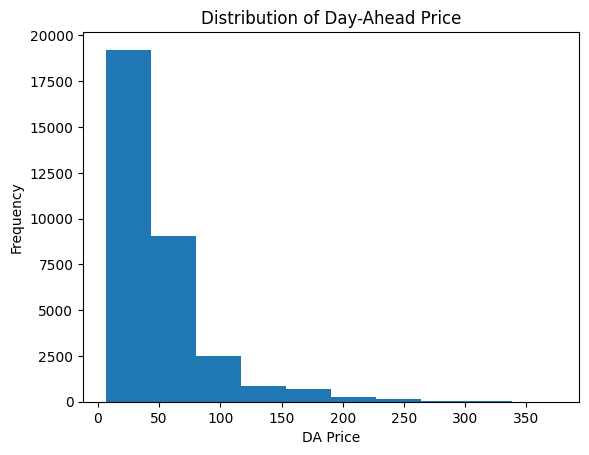

In [4]:
da_min=np.min(merged_df['DA Price'])
da_q1=np.percentile(merged_df['DA Price'],25)
da_median=np.median(merged_df['DA Price'])
da_q3=np.percentile(merged_df['DA Price'],75)
da_max=np.max(merged_df['DA Price'])
da_std=np.std(merged_df['DA Price'])
print("Minimum:", da_min)
print("Q1 (First Quartile):", da_q1)
print("Median (Q2):", da_median)
print("Q3 (Third Quartile):", da_q3)
print("Maximum:", da_max)
print("Standard Deviation",da_std)
plt.hist(merged_df["DA Price"])
plt.xlabel("DA Price")
plt.ylabel("Frequency")
plt.title("Distribution of Day-Ahead Price")
plt.show()

Minimum: -151.05
Q1 (First Quartile): 21.65
Median (Q2): 35.17
Q3 (Third Quartile): 58.59
Maximum: 2274.99
Standard Deviation 47.28401494245206


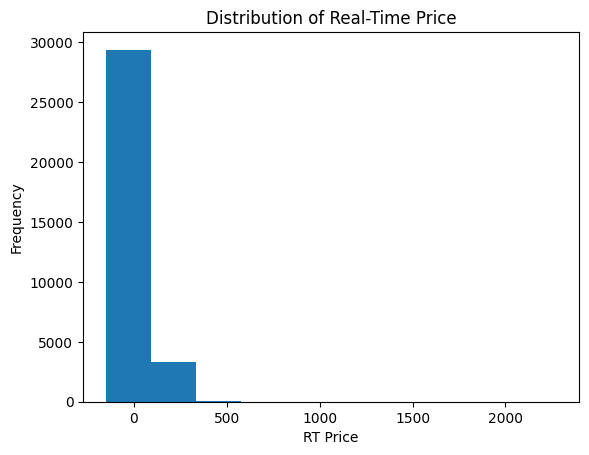

In [5]:
rt_min=np.min(merged_df['RT Price'])
rt_q1=np.percentile(merged_df['RT Price'],25)
rt_median=np.median(merged_df['RT Price'])
rt_q3=np.percentile(merged_df['RT Price'],75)
rt_max=np.max(merged_df['RT Price'])
rt_std=np.std(merged_df['RT Price'])
print("Minimum:", rt_min)
print("Q1 (First Quartile):", rt_q1)
print("Median (Q2):", rt_median)
print("Q3 (Third Quartile):", rt_q3)
print("Maximum:", rt_max)
print("Standard Deviation",rt_std)
plt.hist(merged_df["RT Price"])
plt.xlabel("RT Price")
plt.ylabel("Frequency")
plt.title("Distribution of Real-Time Price")
plt.show()

Price range and variation showed quite different patterns. Day-Ahead price has a lower standard deviation than Real-Time price. the price distribution also showed a discrepeny between DA and RT price, which means that most of the time we can earn revenue from the trading if we trade in correct direction.

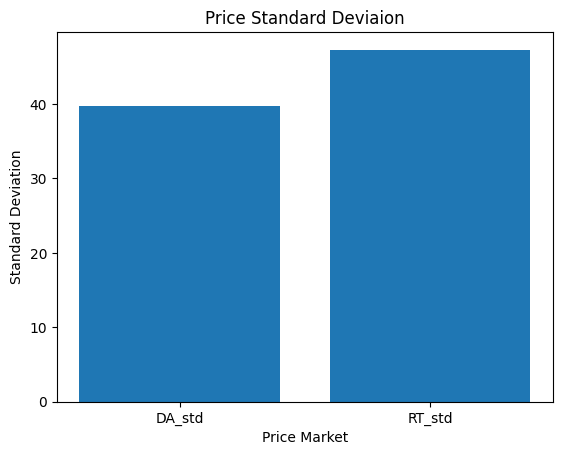

In [ ]:
price_std=[da_std,rt_std]
price_label = ['DA_std', 'RT_std']
plt.bar(price_label,price_std)
plt.title("Price Standard Deviaion")
plt.xlabel("Price Market")
plt.ylabel("Standard Deviation")
plt.show()

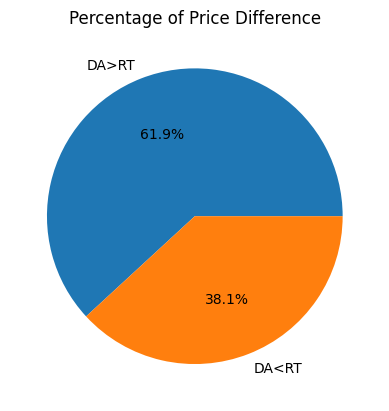

In [ ]:
inc_time=len(merged_df[merged_df['DA Price']>merged_df["RT Price"]])
inc_percent=inc_time/len(merged_df)
dec_percent=1-inc_percent
trade_percent=[inc_percent,dec_percent]
label=["DA>RT","DA<RT"]
plt.pie(trade_percent,labels=label,autopct='%1.1f%%')
plt.title("Percentage of Price Difference")
plt.show()

The bar chart suggests that if Naive rule was applied, Incremental transaction should be used everyday in every hour.

In [ ]:
coef_matrix=merged_df.corr()
da_coef=coef_matrix['DA Price']
da_coef

<ipython-input-17-c75b01111d8f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  coef_matrix=merged_df.corr()


HE                                 0.114996
String                                  NaN
DA Price                           1.000000
RT Price                           0.834715
MWh                                0.455690
Fuel Price                         0.846218
Forward Reserve Threshold Price    0.848412
RT Demand                          0.453009
Day of Week_Mon                    0.028355
Day of Week_Sat                   -0.018087
Day of Week_Sun                   -0.031028
Day of Week_Thu                   -0.005102
Day of Week_Tue                    0.022059
Day of Week_Wed                    0.004013
Holiday_y                          0.002679
Name: DA Price, dtype: float64

The coefficient matrix suggest that factors like Fuel Price, Forward Reserve Threhold Price and system demand can have decent impacts on the Day-ahead price. While hour ending and day of week might not have the expected impacts on the Day-ahead price.

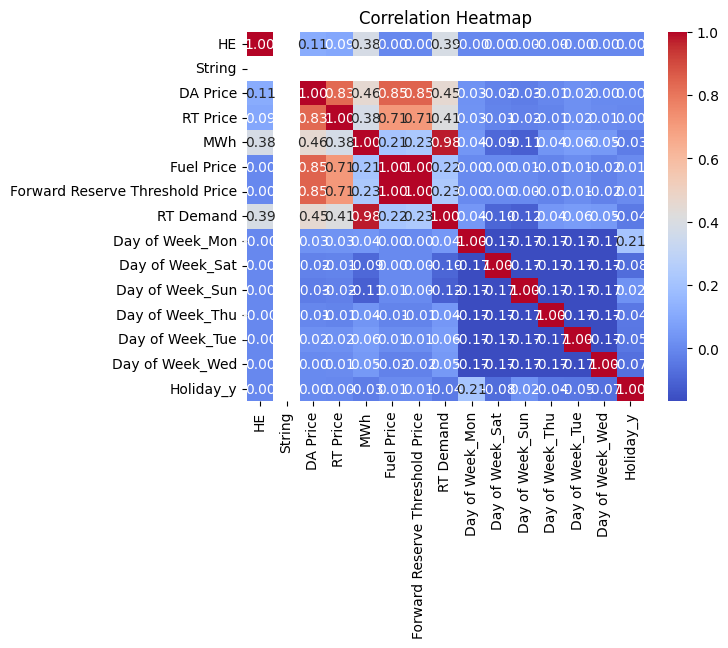

In [ ]:
sns.heatmap(coef_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
df_test=merged_df.drop('Date',axis=1)
X=df_test.drop(['DA Price','RT Demand','RT Price','String'],axis=1)
y=df_test['DA Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

The following code tested Linear regression, lasso and ridge regression, polynomial degree 2 and 3, decision tree, random forest, gradiant boosting tree, tensorflow, and support vector machine. Using 3 performance metrics to assess the predictive performance of the model, which are mean absolute error, mean absolute percentage error, and root mean square error.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

def mean_absolute_percentage_error(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Square Error (RMSE):", rmse)

Mean Absolute Error (MAE): 10.532057027587937
Mean Absolute Percentage Error (MAPE): 24.280449178304476
Root Mean Square Error (RMSE): 17.49021400648849


In [ ]:
lm_pred_train=model.predict(X_train)
lm_train_mae = mean_absolute_error(y_train, lm_pred_train)
lm_train_mape = mean_absolute_percentage_error(y_train, lm_pred_train)
lm_train_rmse = np.sqrt(mean_squared_error(y_train, lm_pred_train))
print("Mean Absolute Error (MAE):", lm_train_mae)
print("Mean Absolute Percentage Error (MAPE):", lm_train_mape)
print("Root Mean Square Error (RMSE):", lm_train_rmse)

Mean Absolute Error (MAE): 10.55530359615383
Mean Absolute Percentage Error (MAPE): 24.197803992486705
Root Mean Square Error (RMSE): 17.96085036288046


In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


linear_reg = LinearRegression()
lasso_reg = Lasso(alpha=0.1)
ridge_reg = Ridge(alpha=0.1)


linear_reg.fit(X_train, y_train)
lasso_reg.fit(X_train_scaled, y_train)
ridge_reg.fit(X_train_scaled, y_train)


y_pred_linear = linear_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test_scaled)
y_pred_ridge = ridge_reg.predict(X_test_scaled)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

In [ ]:
print("Mean Absolute Error (MAE):", mae_lasso)
print("Mean Absolute Percentage Error (MAPE):", mape_lasso)
print("Root Mean Square Error (RMSE):", rmse_lasso)

Mean Absolute Error (MAE): 10.569742918142508
Mean Absolute Percentage Error (MAPE): 24.185690688113993
Root Mean Square Error (RMSE): 17.54243383331219


In [ ]:
la_pred_train=lasso_reg.predict(X_train_scaled)
la_train_mae = mean_absolute_error(y_train, la_pred_train)
la_train_mape = mean_absolute_percentage_error(y_train, la_pred_train)
la_train_rmse = np.sqrt(mean_squared_error(y_train, la_pred_train))
print("Mean Absolute Error (MAE):", la_train_mae)
print("Mean Absolute Percentage Error (MAPE):", la_train_mape)
print("Root Mean Square Error (RMSE):", la_train_rmse)

Mean Absolute Error (MAE): 10.578233654471875
Mean Absolute Percentage Error (MAPE): 24.083791398297706
Root Mean Square Error (RMSE): 17.98849985233588


In [ ]:
print("Mean Absolute Error (MAE):", mae_ridge)
print("Mean Absolute Percentage Error (MAPE):", mape_ridge)
print("Root Mean Square Error (RMSE):", rmse_ridge)

Mean Absolute Error (MAE): 10.532144637304594
Mean Absolute Percentage Error (MAPE): 24.28018455674082
Root Mean Square Error (RMSE): 17.49032828006696


In [ ]:
ri_pred_train=ridge_reg.predict(X_train_scaled)
ri_train_mae = mean_absolute_error(y_train, ri_pred_train)
ri_train_mape = mean_absolute_percentage_error(y_train, ri_pred_train)
ri_train_rmse = np.sqrt(mean_squared_error(y_train, ri_pred_train))
print("Mean Absolute Error (MAE):", ri_train_mae)
print("Mean Absolute Percentage Error (MAPE):", ri_train_mape)
print("Root Mean Square Error (RMSE):", ri_train_rmse)

Mean Absolute Error (MAE): 10.555358165159404
Mean Absolute Percentage Error (MAPE): 24.197480414785474
Root Mean Square Error (RMSE): 17.9608507859787


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
poly_model2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_model2.fit(X_train, y_train)
y_pred_poly2 = poly_model2.predict(X_test)
mae_poly2 = mean_absolute_error(y_test, y_pred_poly2)
mape_poly2 = mean_absolute_percentage_error(y_test, y_pred_poly2)
rmse_poly2 = np.sqrt(mean_squared_error(y_test, y_pred_poly2))
print("Mean Absolute Error (MAE):", mae_poly2)
print("Mean Absolute Percentage Error (MAPE):", mape_poly2)
print("Root Mean Square Error (RMSE):", rmse_poly2)

Mean Absolute Error (MAE): 8.946987930724346
Mean Absolute Percentage Error (MAPE): 19.917454793750146
Root Mean Square Error (RMSE): 14.146910578455893


In [ ]:
pl2_pred_train=poly_model2.predict(X_train)
pl2_train_mae = mean_absolute_error(y_train, pl2_pred_train)
pl2_train_mape = mean_absolute_percentage_error(y_train, pl2_pred_train)
pl2_train_rmse = np.sqrt(mean_squared_error(y_train, pl2_pred_train))
print("Mean Absolute Error (MAE):", pl2_train_mae)
print("Mean Absolute Percentage Error (MAPE):", pl2_train_mape)
print("Root Mean Square Error (RMSE):", pl2_train_rmse)

Mean Absolute Error (MAE): 9.104915251007888
Mean Absolute Percentage Error (MAPE): 20.078066027579315
Root Mean Square Error (RMSE): 14.735484085356674


In [ ]:
poly_model3 = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_model3.fit(X_train, y_train)
y_pred_poly3 = poly_model3.predict(X_test)
mae_poly3 = mean_absolute_error(y_test, y_pred_poly3)
mape_poly3 = mean_absolute_percentage_error(y_test, y_pred_poly3)
rmse_poly3 = np.sqrt(mean_squared_error(y_test, y_pred_poly3))
print("Mean Absolute Error (MAE):", mae_poly3)
print("Mean Absolute Percentage Error (MAPE):", mape_poly3)
print("Root Mean Square Error (RMSE):", rmse_poly3)

Mean Absolute Error (MAE): 8.386784341795
Mean Absolute Percentage Error (MAPE): 19.171417942959483
Root Mean Square Error (RMSE): 13.039966861730639


In [ ]:
pl3_pred_train=poly_model3.predict(X_train)
pl3_train_mae = mean_absolute_error(y_train, pl3_pred_train)
pl3_train_mape = mean_absolute_percentage_error(y_train, pl3_pred_train)
pl3_train_rmse = np.sqrt(mean_squared_error(y_train, pl3_pred_train))
print("Mean Absolute Error (MAE):", pl3_train_mae)
print("Mean Absolute Percentage Error (MAPE):", pl3_train_mape)
print("Root Mean Square Error (RMSE):", pl3_train_rmse)

Mean Absolute Error (MAE): 8.363172484705553
Mean Absolute Percentage Error (MAPE): 19.075168908165782
Root Mean Square Error (RMSE): 13.117659093505289


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print("Mean Absolute Error (MAE):", mae_dt)
print("Mean Absolute Percentage Error (MAPE):", mape_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)

Mean Absolute Error (MAE): 5.737975011427701
Mean Absolute Percentage Error (MAPE): 11.896848096981751
Root Mean Square Error (RMSE): 10.861070259821801


In [ ]:
dt_pred_train=dt.predict(X_train)
dt_train_mae = mean_absolute_error(y_train, dt_pred_train)
dt_train_mape = mean_absolute_percentage_error(y_train, dt_pred_train)
dt_train_rmse = np.sqrt(mean_squared_error(y_train, dt_pred_train))
print("Mean Absolute Error (MAE):", dt_train_mae)
print("Mean Absolute Percentage Error (MAPE):", dt_train_mape)
print("Root Mean Square Error (RMSE):", dt_train_rmse)

Mean Absolute Error (MAE): 0.0
Mean Absolute Percentage Error (MAPE): 0.0
Root Mean Square Error (RMSE): 0.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Absolute Percentage Error (MAPE):", mape_rf)
print("Root Mean Square Error (RMSE):", rmse_rf)

Mean Absolute Error (MAE): 4.46098764284626
Mean Absolute Percentage Error (MAPE): 9.303837818317987
Root Mean Square Error (RMSE): 7.889511867982927


In [ ]:
y_pred_train=rf.predict(X_train)
mae_train=mean_absolute_error(y_train, y_pred_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Mean Absolute Error (MAE):", mae_train)
print("Mean Absolute Percentage Error (MAPE):", mape_train)
print("Root Mean Square Error (RMSE):", rmse_train)

Mean Absolute Error (MAE): 1.6686240152380951
Mean Absolute Percentage Error (MAPE): 3.4709026007236345
Root Mean Square Error (RMSE): 2.9971505934243603


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mape_gb = mean_absolute_percentage_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print("Mean Absolute Error (MAE):", mae_gb)
print("Mean Absolute Percentage Error (MAPE):", mape_gb)
print("Root Mean Square Error (RMSE):", rmse_gb)

Mean Absolute Error (MAE): 7.91166003651686
Mean Absolute Percentage Error (MAPE): 17.402663774319286
Root Mean Square Error (RMSE): 13.059613265978491


In [ ]:
gb_pred_train=gb_reg.predict(X_train)
gb_train_mae = mean_absolute_error(y_train, gb_pred_train)
gb_train_mape = mean_absolute_percentage_error(y_train, gb_pred_train)
gb_train_rmse = np.sqrt(mean_squared_error(y_train, gb_pred_train))
print("Mean Absolute Error (MAE):", gb_train_mae)
print("Mean Absolute Percentage Error (MAPE):", gb_train_mape)
print("Root Mean Square Error (RMSE):", gb_train_rmse)

Mean Absolute Error (MAE): 7.717276569691082
Mean Absolute Percentage Error (MAPE): 17.102394270684453
Root Mean Square Error (RMSE): 12.776263843532126


In [ ]:
import tensorflow as tf

tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

tf_model.compile(optimizer='adam', loss='mean_squared_error')
tf_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
y_pred_tf = tf_model.predict(X_test)
mae_tf = mean_absolute_error(y_test, y_pred_tf)
mape_tf = mean_absolute_percentage_error(y_test, y_pred_tf)
rmse_tf = np.sqrt(mean_squared_error(y_test, y_pred_tf))
print("Mean Absolute Error (MAE):", mae_tf)
print("Mean Absolute Percentage Error (MAPE):", mape_tf)
print("Root Mean Square Error (RMSE):", rmse_tf)

Epoch 1/50
657/657 [==============================] - 2s 2ms/step - loss: 1501.6566 - val_loss: 533.4733
Epoch 2/50
657/657 [==============================] - 2s 2ms/step - loss: 767.0185 - val_loss: 551.3159
Epoch 3/50
657/657 [==============================] - 2s 3ms/step - loss: 940.8591 - val_loss: 769.0122
Epoch 4/50
657/657 [==============================] - 2s 3ms/step - loss: 736.8248 - val_loss: 474.0022
Epoch 5/50
657/657 [==============================] - 1s 2ms/step - loss: 692.8264 - val_loss: 401.3696
Epoch 6/50
657/657 [==============================] - 1s 2ms/step - loss: 691.2854 - val_loss: 1201.8759
Epoch 7/50
657/657 [==============================] - 1s 2ms/step - loss: 700.5263 - val_loss: 487.1012
Epoch 8/50
657/657 [==============================] - 1s 2ms/step - loss: 691.4809 - val_loss: 912.4525
Epoch 9/50
657/657 [==============================] - 1s 2ms/step - loss: 629.3918 - val_loss: 495.9149
Epoch 10/50
657/657 [==============================] - 1s 2ms/

In [ ]:
tf_pred_train=tf_model.predict(X_train)
tf_train_mae = mean_absolute_error(y_train, tf_pred_train)
tf_train_mape = mean_absolute_percentage_error(y_train, tf_pred_train)
tf_train_rmse = np.sqrt(mean_squared_error(y_train, tf_pred_train))
print("Mean Absolute Error (MAE):", tf_train_mae)
print("Mean Absolute Percentage Error (MAPE):", tf_train_mape)
print("Root Mean Square Error (RMSE):", tf_train_rmse)

821/821 [==============================] - 1s 2ms/step
Mean Absolute Error (MAE): 10.267228422319684
Mean Absolute Percentage Error (MAPE): 85.9692324339898
Root Mean Square Error (RMSE): 19.582981588716084


In [ ]:
from sklearn.svm import SVR
svmreg = SVR()
svmreg.fit(X_train, y_train)
y_pred_svm = svmreg.predict(X_test)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mape_svm = mean_absolute_percentage_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
print("Mean Absolute Error (MAE):", mae_svm)
print("Mean Absolute Percentage Error (MAPE):", mape_svm)
print("Root Mean Square Error (RMSE):", rmse_svm)


Mean Absolute Error (MAE): 22.673700547120415
Mean Absolute Percentage Error (MAPE): 43.03381224006066
Root Mean Square Error (RMSE): 37.002016251664394


In [ ]:
sv_pred_train=svmreg.predict(X_train)
sv_train_mae = mean_absolute_error(y_train, sv_pred_train)
sv_train_mape = mean_absolute_percentage_error(y_train, sv_pred_train)
sv_train_rmse = np.sqrt(mean_squared_error(y_train, sv_pred_train))
print("Mean Absolute Error (MAE):", sv_train_mae)
print("Mean Absolute Percentage Error (MAPE):", sv_train_mape)
print("Root Mean Square Error (RMSE):", sv_train_rmse)

Mean Absolute Error (MAE): 22.48952391147936
Mean Absolute Percentage Error (MAPE): 43.08442973042758
Root Mean Square Error (RMSE): 36.91109971096827


In [ ]:
models=["linear","lasso","ridge","poly2","poly3","DT","RF","GBT","TF","SVM"]
model_per={"train_mae":[lm_train_mae,la_train_mae,ri_train_mae,pl2_train_mae,pl3_train_mae,dt_train_mae,mae_train,gb_train_mae,tf_train_mae,sv_train_mae],
      "train_mape":[lm_train_mape,la_train_mape,ri_train_mape,pl2_train_mape,pl3_train_mape,dt_train_mape,mape_train,gb_train_mape,tf_train_mape,sv_train_mape],
      "train_rmse":[lm_train_rmse,la_train_rmse,ri_train_rmse,pl2_train_rmse,pl3_train_rmse,dt_train_rmse,rmse_train,gb_train_rmse,tf_train_rmse,sv_train_rmse],
      "valid_mae":[mae,mae_lasso,mae_ridge,mae_poly2,mae_poly3,mae_dt,mae_rf,mae_gb,mae_tf,mae_svm],
      "valid_mape":[mape,mape_lasso,mape_ridge,mape_poly2,mape_poly3,mape_dt,mape_rf,mape_gb,mape_tf,mape_svm],
      "valid_rmse":[rmse,rmse_lasso,rmse_ridge,rmse_poly2,rmse_poly3,rmse_dt,rmse_rf,rmse_gb,rmse_tf,rmse_svm]}
model_df=pd.DataFrame(model_per,index=models)
model_df

,train_mae,train_mape,train_rmse,valid_mae,valid_mape,valid_rmse
linear,10.555304,24.197804,17.960850,10.532057,24.280449,17.490214
lasso,10.578234,24.083791,17.988500,10.569743,24.185691,17.542434
ridge,10.555358,24.197480,17.960851,10.532145,24.280185,17.490328
poly2,9.104915,20.078066,14.735484,8.946988,19.917455,14.146911
poly3,8.363172,19.075169,13.117659,8.386784,19.171418,13.039967
DT,0.000000,0.000000,0.000000,5.737975,11.896848,10.861070
RF,1.668624,3.470903,2.997151,4.460988,9.303838,7.889512
GBT,7.717277,17.102394,12.776264,7.911660,17.402664,13.059613
TF,10.267228,85.969232,19.582982,10.373755,86.137370,19.147138
SVM,22.489524,43.084430,36.911100,22.673701,43.033812,37.002016


In [ ]:
def apply_conditional_format(val):
    color = ''
    if val < 5:
        color = 'background-color: green'
    elif 5 <= val <= 10:
        color = 'background-color: yellow'
    elif 10 < val <= 30:
        color = 'background-color: coral'
    else:
        color = 'background-color: red'
    return color
styled_df = model_df.style.applymap(apply_conditional_format)
styled_df

,train_mae,train_mape,train_rmse,valid_mae,valid_mape,valid_rmse
linear,10.555304,24.197804,17.960850,10.532057,24.280449,17.490214
lasso,10.578234,24.083791,17.988500,10.569743,24.185691,17.542434
ridge,10.555358,24.197480,17.960851,10.532145,24.280185,17.490328
poly2,9.104915,20.078066,14.735484,8.946988,19.917455,14.146911
poly3,8.363172,19.075169,13.117659,8.386784,19.171418,13.039967
DT,0.000000,0.000000,0.000000,5.737975,11.896848,10.861070
RF,1.668624,3.470903,2.997151,4.460988,9.303838,7.889512
GBT,7.717277,17.102394,12.776264,7.911660,17.402664,13.059613
TF,10.267228,85.969232,19.582982,10.373755,86.137370,19.147138
SVM,22.489524,43.084430,36.911100,22.673701,43.033812,37.002016


Based on the above table, tree based model usually have better performance than linear models and polynomial models. Deep learning models did not indicate a decent performance against the data standard  deviation.

Among the tree model, Decision tree generated lowest metircs on train set while random forest generated lowest metrics on valid set. However, since the validation performance of decision tree significantly deviated from the train set, it can be concluded that there was a high potiential of overfitting problem.

Since random forset also generated second lowest metrics on train set, we will use random forest for the future forecast.


In [ ]:
def dayofweek(day):
  day_list=[0]*6
  if day=="Fri":
    return day_list
  elif day=="Mon":
    day_list[0]=1
    return day_list
  elif day=="Sat":
    day_list[1]=1
    return day_list
  elif day=="Sun":
    day_list[2]=1
    return day_list
  elif day=="Thu":
    day_list[3]=1
    return day_list
  elif day=="Tue":
    day_list[4]=1
    return day_list
  elif day=="Wed":
    day_list[5]=1
    return day_list

Download three day forecastlist from ISO-New England website

In [ ]:
for_mwh=pd.read_csv("threedayforecastlist.csv")
for_mwh["BeginDate"]=for_mwh["BeginDate"].str.split(" ").str[0]
target_date="10/27/2023"
in_mwh=for_mwh[for_mwh["BeginDate"]==target_date]
in_mwh=in_mwh.drop(["BeginDate","AdjustedMw"],axis=1)
in_mwh

,HourEnd,Mw
24,1,10060
25,2,9600
26,3,9350
27,4,9330
28,5,9540
29,6,10250
30,7,11550
31,8,12420
32,9,12280
33,10,11820


In [ ]:
#input_mwh=[9760,9490,9250,9240,
#    9530,10330,11740,12670,
#    12440,11810,11310,11010,
#    10880,11000,11110,11580,
#    12480,13580,14250,13910,
#    13310,12480,11480,10600]
input_mwh=in_mwh["Mw"]
input_Fuel_Price=2.52
input_Forward_Reserve_Threshold_Price=44.98
input_day_of_week=dayofweek("Fri")
input_holiday=0

demand_day=pd.DataFrame({
    'HE':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],
    'MWh':input_mwh,
    'Fuel Price':[input_Fuel_Price]*24,
    'Forward Reserve Threshold Price':[input_Forward_Reserve_Threshold_Price]*24,
    'Day of Week_Mon':[input_day_of_week[0]]*24,
    'Day of Week_Sat':[input_day_of_week[1]]*24,
    'Day of Week_Sun':[input_day_of_week[2]]*24,
    'Day of Week_Thu':[input_day_of_week[3]]*24,
    'Day of Week_Tue':[input_day_of_week[4]]*24,
    'Day of Week_Wed':[input_day_of_week[5]]*24,
    'Holiday_y':[input_holiday]*24
        })
P_day=rf.predict(demand_day)
P_day
demand_df=pd.DataFrame({
    'HE':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],
    'Predict DA Price':P_day
})

demand_df

,HE,Predict DA Price
0,1,32.0037
1,2,31.2020
2,3,22.8718
3,4,22.9109
4,5,30.0859
5,6,33.8836
6,7,29.5517
7,8,36.5513
8,9,36.3893
9,10,32.9156


The above table will be the reference price for the desired trading date. if we want to do Inc transaction, we will bid in a price a little bit lower than the above price for the specific time period. If we want to do Dec transaction, we will bid in a price a little bit higher than the above price.